In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import array_to_latex as ltx

In [11]:
phi = np.linspace(0, 2*np.pi, 200)

In [12]:
c = 15.06
a = 10.06
b = 5.06
fp=np.arctan(c/a)
fe=np.arctan(c/b)
fm=np.arctan(b/a)

In [13]:
def approx(f,r,Z,X):
    php=np.array([0, np.pi, np.pi / 2, 3 * np.pi / 2, f, np.pi - f, np.pi + f, 2 * np.pi - f])
    y = np.array([0, 0, Z, -Z, np.sin(f) * r, np.sin(f) * r, -np.sin(f) * r, -np.sin(f) * r])
    x = np.array([X, -X, 0, 0, np.cos(f) * r, -np.cos(f) * r, -np.cos(f) * r, np.cos(f) * r])
    yb = np.sin(php)
    xa = np.cos(php)
    b = np.mean(y * yb)/np.mean(yb ** 2)
    a = np.mean(x * xa)/np.mean(xa ** 2)
    return a, b, x, y

In [14]:
w,e,xo,yo=approx(np.pi/4,35.05,34.92,34.92)

In [15]:
ap,bp,xp,yp=approx(fp,25.87,29.93,20.94) #ОСЬ СС' Вдоль OY, ОСЬ AA' Вдоль OX
ae,be,xe,ye=approx(fe,27.85,29.93,18.55) #ОСЬ ВВ' Вдоль OX, ОСЬ CC' Вдоль OY
am,bm,xm,ym=approx(fm,20.37,18.55,20.94) #ОСЬ AA' Вдоль OX, ОСЬ BB' Вдоль OY

In [16]:
def ellipse(x, y, a, b, st, OY, OX, limx = [-30,30], limy = [-30,30]):
    plt.figure(figsize=(10, 10))

    y_approx = b * np.sin(phi)
    x_approx = a * np.cos(phi)

    plt.plot(x_approx,y_approx, label = st)
    plt.plot(x, y, 'ro', ms = 10,label = "Экспериментальные точки")

    #plt.plot([0,0],limy, 'k')
    #plt.plot(limx,[0,0], 'k')

    plt.xlim(limx)
    plt.ylim(limy)

    #— Decorate the spins
    arrow_length = 20 # In points

    # X-axis arrow
    plt.annotate(OX, xy=(0.993, 0), xycoords=('axes fraction', 'data'),
    xytext=(arrow_length, 0), textcoords='offset points',
    ha = 'left', va = 'center',
    arrowprops = dict(arrowstyle='<|-', fc='black'))

    # Y-axis arrow
    plt.annotate(OY, xy = (0, 0.993), xycoords = ('data', 'axes fraction'),
    xytext = (0, arrow_length), textcoords = 'offset points',
    ha = 'center', va = 'bottom',
    arrowprops = dict(arrowstyle = '<|-', fc = 'black'))

    plt.minorticks_on()
    plt.grid(which = 'major', lw = 2)
    plt.grid(which = 'minor', lw = 1)
    plt.legend(loc = 'upper left')

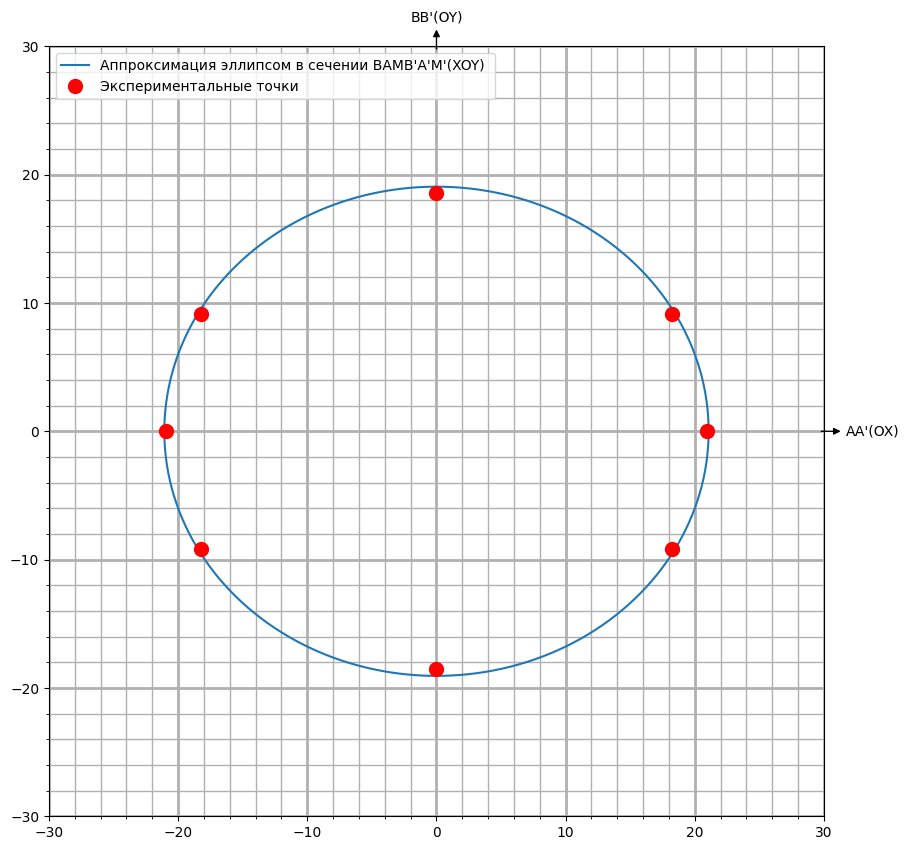

In [17]:
ellipse(xm,ym,21.07,19.06,"""Аппроксимация эллипсом в сечении BAMB'A'M'(XOY) ""","""BB'(OY)""", """AA'(OX)""")

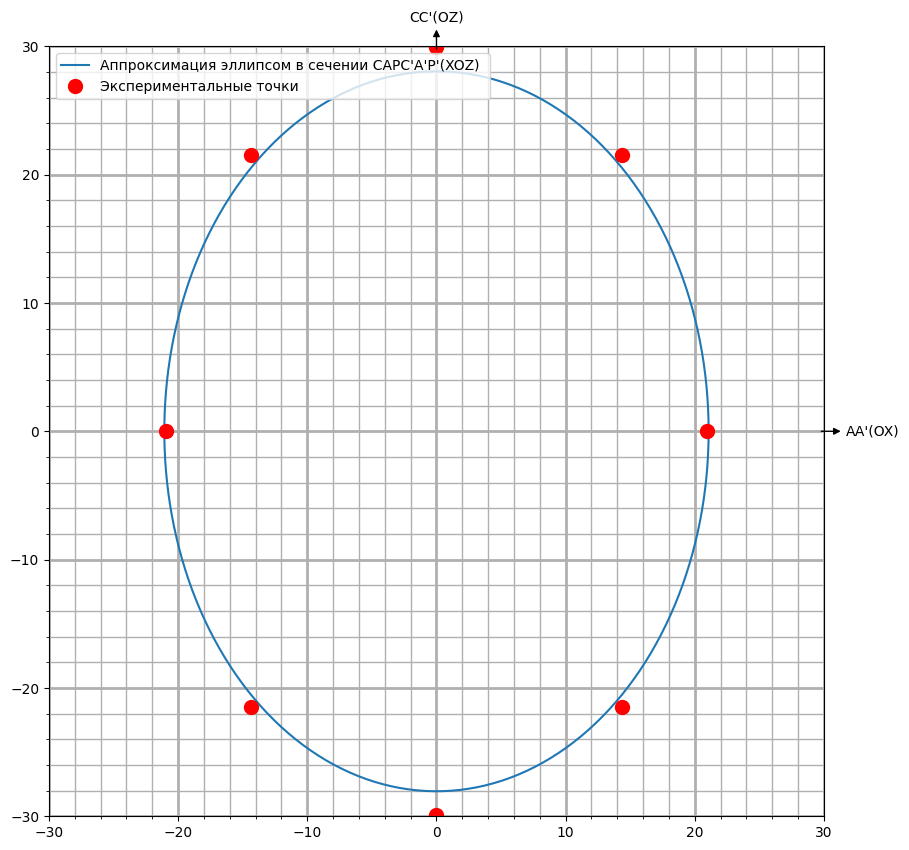

In [18]:
ellipse(xp,yp,21.07,28.05,"""Аппроксимация эллипсом в сечении CAPC'A'P'(XOZ) ""","""CC'(OZ)""", """AA'(OX)""")